In [2]:
import numpy as np
import pandas as pd

%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

import datetime

In [3]:
df = pd.read_csv("driverdata.csv")

## Synthetic Data Generated 
Representing a historical fines record of a random user.

In [4]:
df.head(10)

,Violation,Cost,Time,Date
0,overspeed,600.0,9:33:00 AM,3/10/2015
1,Parking,300.0,12:33:00 PM,4/7/2015
2,Salik,50.0,1:33:00 PM,6/17/2015
3,Salik,50.0,2:33:00 PM,10/14/2015
4,Parking,300.0,12:33:00 PM,8/20/2015
5,overspeed,600.0,10:33:00 PM,9/23/2015
6,overspeed,600.0,6:33:00 PM,3/10/2016
7,Parking,300.0,4:33:00 PM,6/21/2016
8,Salik,50.0,3:33:00 PM,8/17/2016
9,Parking,300.0,12:33:00 PM,11/23/2016


### Data handling

In [5]:
# df['Date'] = pd.to_datetime(df['Date'])

In [6]:
df.describe()

,Cost
count,29.000000
mean,346.551724
std,237.521065
min,50.000000
25%,50.000000
50%,300.000000
75%,600.000000
max,600.000000


In [7]:
print (df.dtypes)

Violation     object
Cost         float64
Time          object
Date          object
dtype: object


In [8]:
df.shape

(29, 4)

In [9]:
df.head()

,Violation,Cost,Time,Date
0,overspeed,600.0,9:33:00 AM,3/10/2015
1,Parking,300.0,12:33:00 PM,4/7/2015
2,Salik,50.0,1:33:00 PM,6/17/2015
3,Salik,50.0,2:33:00 PM,10/14/2015
4,Parking,300.0,12:33:00 PM,8/20/2015


### Extracting years and month in series

In [10]:
df['Year'] = pd.DatetimeIndex(df['Date']).year
df['Month'] = pd.DatetimeIndex(df['Date']).month
df.head()

,Violation,Cost,Time,Date,Year,Month
0,overspeed,600.0,9:33:00 AM,3/10/2015,2015,3
1,Parking,300.0,12:33:00 PM,4/7/2015,2015,4
2,Salik,50.0,1:33:00 PM,6/17/2015,2015,6
3,Salik,50.0,2:33:00 PM,10/14/2015,2015,10
4,Parking,300.0,12:33:00 PM,8/20/2015,2015,8


### Fines per years

In [11]:
df['Year'].value_counts(ascending=True)

2020    1
2018    4
2019    4
2016    5
2015    6
2017    9
Name: Year, dtype: int64

Text(0.5, 0, 'Years')

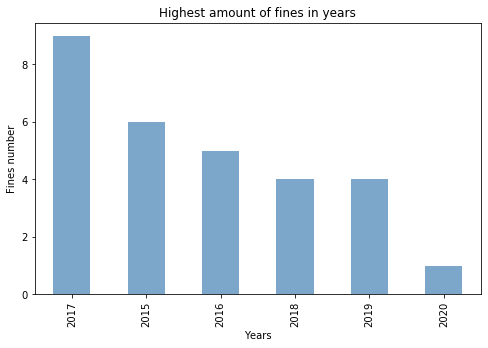

In [12]:
df['Year'].value_counts(ascending=True).nlargest(10).plot.bar(alpha=0.70, color='steelblue',figsize=(8, 5))

plt.title('Highest amount of fines in years')
plt.ylabel('Fines number')
plt.xlabel('Years')

### Fines per violation type

In [13]:
df['Violation'].value_counts()

overspeed    12
Salik         9
Parking       8
Name: Violation, dtype: int64

Text(0.5, 0, 'Violations')

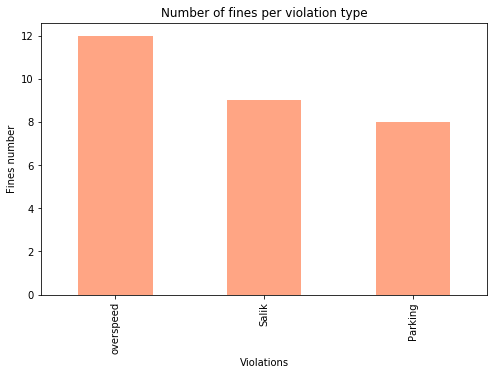

In [17]:
df['Violation'].value_counts(sort=True).nlargest(10).plot.bar(alpha=0.70, color='coral',figsize=(8, 5))
plt.title('Number of fines per violation type')
plt.ylabel('Fines number')
plt.xlabel('Violations')

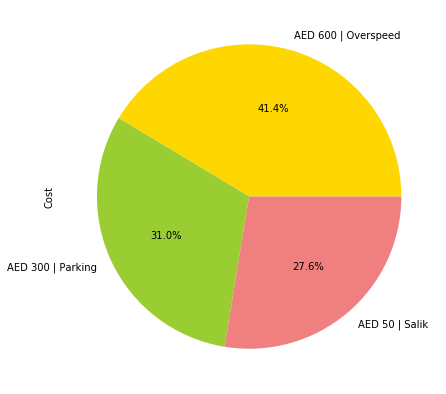

In [22]:
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
labels = 'AED 600 | Overspeed', 'AED 300 | Parking', 'AED 50 | Salik'
df['Cost'].value_counts().plot.pie(figsize=(10, 7), colors=colors, labels=labels, autopct='%1.1f%%')